In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [19]:
from typing_extensions import ParamSpecArgs
def load_data(filepath):
    """Prepares customer data for analysis."""
    pass
def apply_pca(x, n_components):
    pass

def find_optimal_clusters(x, max_clusters=10):
    pass
def perform_kmeans_clustering(x, n_clusters=None):
    ParamSpecArgs
def perform_agglomerative_clustering(x, n_clusters=None):
    pass
def get_linkages(x):
    pass

def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
def load_data(filepath):
    """Loads and prepares bank customer data for clustering.

    This function performs:
    - Data loading from CSV.
    - Encoding of categorical attributes.
    - Scaling of numerical features.
    """
    customer_data_frame = pd.read_csv(filepath, sep=';')
    transformed_data_frame = customer_data_frame.copy()

    category_columns = ['job', 'marital', 'education', 'default', 'housing',
                        'loan', 'contact', 'month', 'poutcome', 'y']

    label_encoder = LabelEncoder()
    for column_name in category_columns:
        if column_name in transformed_data_frame.columns:
            transformed_data_frame[column_name] = label_encoder.fit_transform(transformed_data_frame[column_name])

    selected_features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
                'housing', 'loan', 'default']

    feature_matrix = transformed_data_frame[selected_features]

    feature_scaler = StandardScaler()
    scaled_feature_matrix = feature_scaler.fit_transform(feature_matrix)

    return scaled_feature_matrix, customer_data_frame

processed_features_scaled, original_data = load_data('bank-full.csv')
print("Processed feature matrix shape:", processed_features_scaled.shape)


Processed feature matrix shape: (45211, 9)


Creating Feature Correlation Matrix...


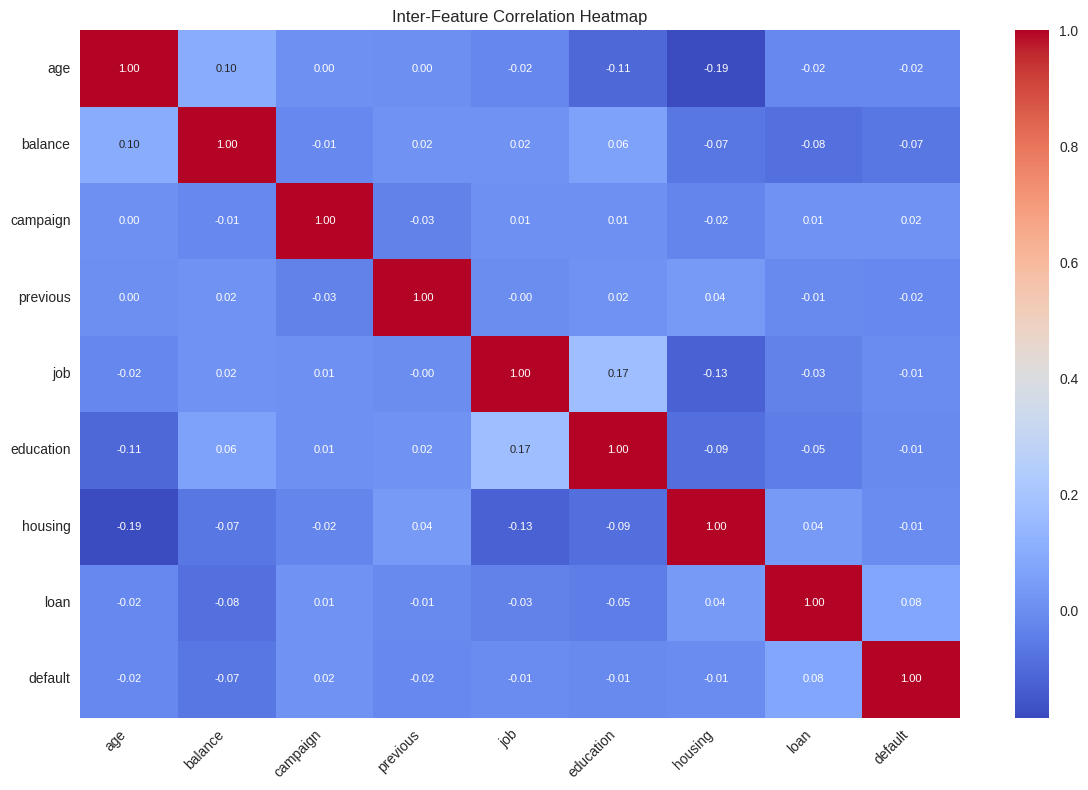

Correlation heatmap saved as 'feature_correlation_heatmap.png'.


In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

try:
    customer_raw_df = pd.read_csv('bank-full.csv', sep=';')
except FileNotFoundError:
    print("Error: 'bank-full.csv' not found. Ensure the data file is in the correct directory.")
    raise

processed_customer_df = customer_raw_df.copy()

category_labels = ['job', 'marital', 'education', 'default', 'housing',
                   'loan', 'contact', 'month', 'poutcome', 'y']

label_encoder = LabelEncoder()
for col_name in category_labels:
    if col_name in processed_customer_df.columns:
        processed_customer_df[col_name] = label_encoder.fit_transform(processed_customer_df[col_name])

correlation_features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
                        'housing', 'loan', 'default']
selected_for_corr_df = processed_customer_df[correlation_features]

print("Creating Feature Correlation Matrix...")
plt.figure(figsize=(12, 8))

correlation_matrix = selected_for_corr_df.corr()

sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            annot_kws={"size": 8})

plt.title('Inter-Feature Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('feature_correlation_heatmap.png')
plt.show()

print("Correlation heatmap saved as 'feature_correlation_heatmap.png'.")


In [24]:
class KMeansClustering:
    """Minimal K-means implementation for educational purposes.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, data_matrix):
        """Selects initial centroids randomly from the data points."""
        np.random.seed(self.random_state)
        n_samples = data_matrix.shape[0]
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        initial_centroids = data_matrix[random_indices]
        return initial_centroids

    def _assign_clusters(self, data_matrix):
        """Assigns each data point to its closest centroid using Euclidean distance."""
        differences = data_matrix[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]
        distances = np.linalg.norm(differences, axis=2)
        cluster_labels = np.argmin(distances, axis=1)
        return cluster_labels

    def _update_centroids(self, data_matrix, labels):
        """Recalculates centroids as the mean of points assigned to each cluster."""
        n_features = data_matrix.shape[1]
        new_centroid_positions = np.zeros((self.n_clusters, n_features))

        for k_idx in range(self.n_clusters):
            points_in_current_cluster = data_matrix[labels == k_idx]
            if len(points_in_current_cluster) > 0:
                new_centroid_positions[k_idx] = np.mean(points_in_current_cluster, axis=0)
            else:
                new_centroid_positions[k_idx] = self.centroids[k_idx]
        return new_centroid_positions

    def fit(self, data_matrix):
        """Executes the K-means algorithm until convergence or max iterations are reached."""
        self.centroids = self._initialize_centroids(data_matrix)

        for _ in range(self.max_iters):
            previous_centroids = np.copy(self.centroids)
            current_labels = self._assign_clusters(data_matrix)
            self.centroids = self._update_centroids(data_matrix, current_labels)

            if np.allclose(previous_centroids, self.centroids):
                break

        self.labels = self._assign_clusters(data_matrix)
        return self

    def predict(self, data_matrix):
        """Assigns cluster labels to new data points using learned centroids."""
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(data_matrix)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

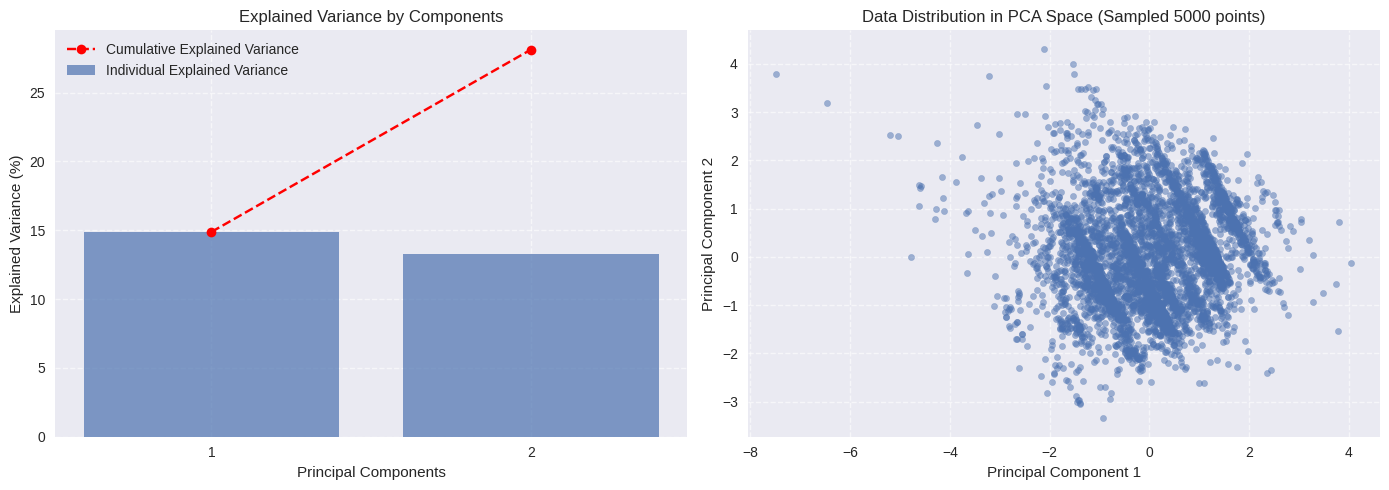

Explained variance ratio: [0.14878447 0.13240902]
Cumulative variance captured by 2 components: 28.12%
Shape after PCA reduction: (45211, 2)


In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def apply_pca(X, n_components=2):
    """Applies Principal Component Analysis for dimensionality reduction.

    Generates visualizations for:
    - Explained variance per component.
    - Cumulative explained variance.
    - Data distribution in the reduced 2D space.
    """
    pca_model = PCA(n_components=n_components, random_state=42)
    reduced_data = pca_model.fit_transform(X)

    explained_variance = pca_model.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.bar(range(1, n_components + 1), explained_variance * 100, alpha=0.7,
            align='center', label='Individual Explained Variance')
    plt.plot(range(1, n_components + 1), cumulative_variance * 100,
             marker='o', linestyle='--', color='r', label='Cumulative Explained Variance')

    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance (%)')
    plt.title('Explained Variance by Components')
    plt.xticks(range(1, n_components + 1))
    plt.legend(loc='best')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.subplot(1, 2, 2)
    sample_size = 5000
    if reduced_data.shape[0] > sample_size:
        np.random.seed(42)
        sample_indices = np.random.choice(reduced_data.shape[0], sample_size, replace=False)
        sampled_reduced_data = reduced_data[sample_indices]
    else:
        sampled_reduced_data = reduced_data

    plt.scatter(sampled_reduced_data[:, 0], sampled_reduced_data[:, 1], s=20, alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Data Distribution in PCA Space (Sampled {min(sample_size, reduced_data.shape[0])} points)')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.savefig('pca_transformation_plots.png')
    plt.show()

    print(f"Explained variance ratio: {explained_variance}")
    print(f"Cumulative variance captured by {n_components} components: {cumulative_variance[-1] * 100:.2f}%")

    return reduced_data

reduced_data_pca = apply_pca(processed_features_scaled)
print("Shape after PCA reduction:", reduced_data_pca.shape)


## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

Calculating inertia for k=1 to 10...


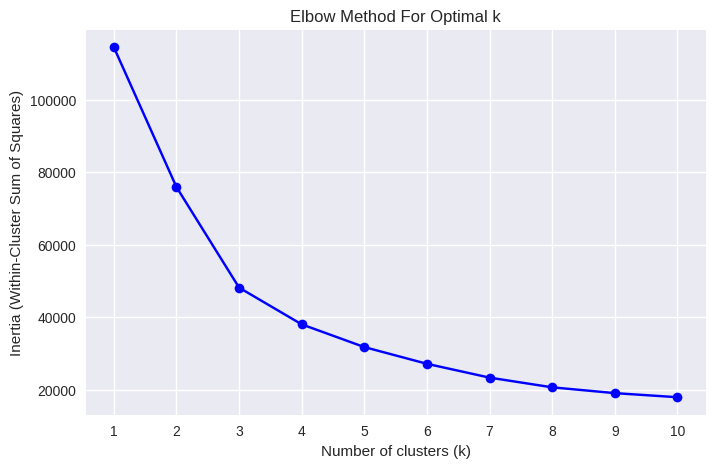

Calculating Silhouette scores for k=2 to 10...


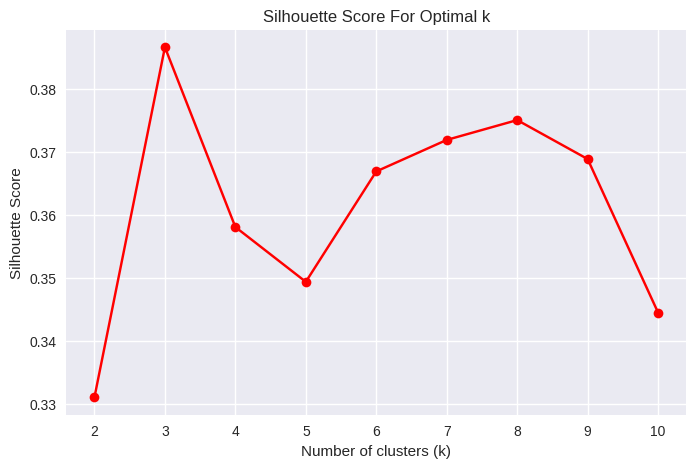

Optimal number of clusters based on highest Silhouette Score: 3
Applying final clustering with k=3...


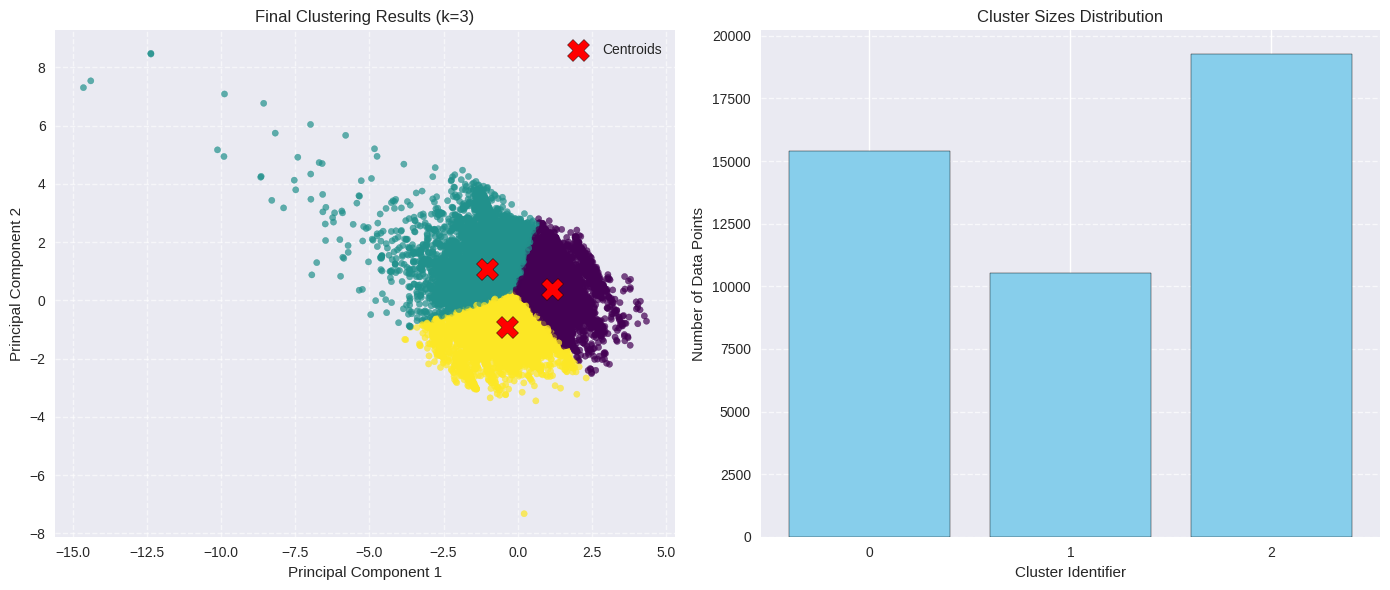


Clustering Performance Evaluation:
Inertia for k=3: 48179.64
Silhouette Score for k=3: 0.39


In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_inertia(X, labels, centroids):
    """Computes the within-cluster sum of squares (inertia) for clustering results."""
    inertia_value = 0
    for k_idx in range(len(centroids)):
        points_in_current_cluster = X[labels == k_idx]
        current_centroid = centroids[k_idx]

        if len(points_in_current_cluster) > 0:
            inertia_value += np.sum((points_in_current_cluster - current_centroid) ** 2)
    return inertia_value

def plot_elbow_curve(X, max_k=10):
    """Generates an elbow curve to help identify the optimal number of clusters."""
    inertia_values = []
    num_clusters_range = range(1, max_k + 1)

    print(f"Calculating inertia for k=1 to {max_k}...")
    for k_val in num_clusters_range:
        kmeans_algo = KMeansClustering(n_clusters=k_val, random_state=42)
        kmeans_algo.fit(X)
        current_inertia = calculate_inertia(X, kmeans_algo.labels, kmeans_algo.centroids)
        inertia_values.append(current_inertia)

    plt.figure(figsize=(8, 5))
    plt.plot(num_clusters_range, inertia_values, 'bo-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
    plt.title('Elbow Method For Optimal k')
    plt.xticks(num_clusters_range)
    plt.grid(True)
    plt.savefig('elbow_method_plot.png')
    plt.show()

    return inertia_values

def plot_silhouette_scores(X, max_k=10):
    """Plots silhouette scores for various numbers of clusters to assess clustering quality."""
    silhouette_results = []
    num_clusters_for_silhouette = range(2, max_k + 1)

    print(f"Calculating Silhouette scores for k=2 to {max_k}...")
    for k_val in num_clusters_for_silhouette:
        kmeans_algo = KMeansClustering(n_clusters=k_val, random_state=42)
        kmeans_algo.fit(X)
        score = silhouette_score(X, kmeans_algo.labels)
        silhouette_results.append(score)

    plt.figure(figsize=(8, 5))
    plt.plot(num_clusters_for_silhouette, silhouette_results, 'ro-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score For Optimal k')
    plt.xticks(num_clusters_for_silhouette)
    plt.grid(True)
    plt.savefig('silhouette_analysis_plot.png')
    plt.show()

    return silhouette_results

inertias = plot_elbow_curve(reduced_data_pca)
silhouette_scores = plot_silhouette_scores(reduced_data_pca, max_k=10)

optimal_k = range(2, 11)[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on highest Silhouette Score: {optimal_k}")

print(f"Applying final clustering with k={optimal_k}...")
kmeans_model = KMeansClustering(n_clusters=optimal_k)
kmeans_model.fit(reduced_data_pca)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(reduced_data_pca[:, 0], reduced_data_pca[:, 1], c=kmeans_model.labels, cmap='viridis', s=20, alpha=0.7)
plt.scatter(kmeans_model.centroids[:, 0], kmeans_model.centroids[:, 1],
            c='red', marker='X', s=250, label='Centroids', edgecolor='black')
plt.title(f'Final Clustering Results (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
unique_labels, counts = np.unique(kmeans_model.labels, return_counts=True)
plt.bar(unique_labels, counts, color='skyblue', edgecolor='black')
plt.xlabel('Cluster Identifier')
plt.ylabel('Number of Data Points')
plt.title('Cluster Sizes Distribution')
plt.xticks(unique_labels)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('final_clustering_visualization.png')
plt.show()

inertia_final = calculate_inertia(reduced_data_pca, kmeans_model.labels, kmeans_model.centroids)
silhouette_final = silhouette_score(reduced_data_pca, kmeans_model.labels)

print("\nClustering Performance Evaluation:")
print(f"Inertia for k={optimal_k}: {inertia_final:.2f}")
print(f"Silhouette Score for k={optimal_k}: {silhouette_final:.2f}")


## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

In [25]:
from sklearn.cluster import KMeans
import numpy as np

class BisectingKMeans:
    """Implements the Bisecting (divisive) K-Means clustering algorithm."""

    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        self.split_tree = {} # Maps parent cluster ID to its two child cluster IDs
        self.centers_ = {}   # Stores centroid for each cluster ID

    def fit_predict(self, input_data):
        input_data = np.array(input_data)
        num_samples = len(input_data)

        cluster_assignments = np.zeros(num_samples, dtype=int)
        next_cluster_id = 1

        while len(np.unique(cluster_assignments)) < self.n_clusters:

            unique_clusters, counts = np.unique(cluster_assignments, return_counts=True)
            cluster_sizes = dict(zip(unique_clusters, counts))
            target_cluster_to_split = max(cluster_sizes, key=cluster_sizes.get)

            cluster_mask = (cluster_assignments == target_cluster_to_split)
            data_in_cluster = input_data[cluster_mask]

            binary_kmeans = KMeans(n_clusters=2, random_state=self.random_state)
            sub_cluster_labels = binary_kmeans.fit_predict(data_in_cluster)

            # The original cluster becomes the 'left' child
            left_child_id = target_cluster_to_split
            # A new ID is assigned for the 'right' child
            right_child_id = next_cluster_id

            cluster_assignments[cluster_mask] = np.where(sub_cluster_labels == 0, left_child_id, cluster_assignments[cluster_mask])
            cluster_assignments[cluster_mask] = np.where(sub_cluster_labels == 1, right_child_id, cluster_assignments[cluster_mask])

            self.split_tree[target_cluster_to_split] = (left_child_id, right_child_id)
            self.centers_[left_child_id] = binary_kmeans.cluster_centers_[0]
            self.centers_[right_child_id] = binary_kmeans.cluster_centers_[1]

            next_cluster_id += 1

        self.labels_ = cluster_assignments
        return cluster_assignments


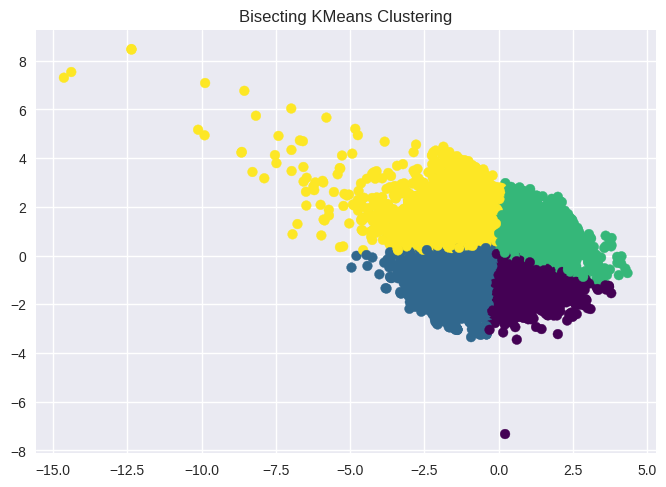

In [26]:
bisect = BisectingKMeans(n_clusters=4)
labels = bisect.fit_predict(reduced_data_pca)

plt.scatter(reduced_data_pca[:, 0], reduced_data_pca[:, 1], c=labels, cmap='viridis')
plt.title("Bisecting KMeans Clustering")
plt.show()


## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!

In [27]:
class KMeansPlusPlus(KMeansClustering):
    """
    Extends KMeansClustering to use the k-means++ initialization method,
    which generally leads to better and more stable clustering results.
    """

    def _initialize_centroids(self, input_features):
        """Initializes centroids using the k-means++ algorithm."""
        np.random.seed(self.random_state)
        n_samples, n_dimensions = input_features.shape

        centroids_array = np.zeros((self.n_clusters, n_dimensions))

        first_centroid_index = np.random.randint(n_samples)
        centroids_array[0] = input_features[first_centroid_index]

        min_squared_distances = np.full(n_samples, np.inf)

        for k_idx in range(1, self.n_clusters):
            squared_distances_to_newest_centroid = np.sum((input_features - centroids_array[k_idx-1])**2, axis=1)
            min_squared_distances = np.minimum(min_squared_distances, squared_distances_to_newest_centroid)

            selection_probabilities = min_squared_distances / np.sum(min_squared_distances)

            next_centroid_index = np.random.choice(n_samples, p=selection_probabilities)

            centroids_array[k_idx] = input_features[next_centroid_index]

            min_squared_distances[next_centroid_index] = 0.0

        return centroids_array

print("Executing K-Means with k-means++ initialization...")

kmeans_plusplus_model = KMeansPlusPlus(n_clusters=3, random_state=42)
kmeans_plusplus_model.fit(reduced_data_pca)

print("k-means++ fitting complete.")


Executing K-Means with k-means++ initialization...
k-means++ fitting complete.


--- Initiating Cluster Interpretation ---
--- Cluster Averages (Numerical Features) ---
               age      balance  campaign  previous
cluster                                            
0        39.375316   691.043605  2.662773  0.554409
1        52.785220  2937.094298  2.810360  0.469595
2        35.699932  1037.442131  2.819253  0.661665


--- Cluster Modes (Categorical Features) ---
                 job  education housing loan  marital
cluster                                              
0        blue-collar  secondary     yes   no  married
1         management  secondary      no   no  married
2         management   tertiary     yes   no  married


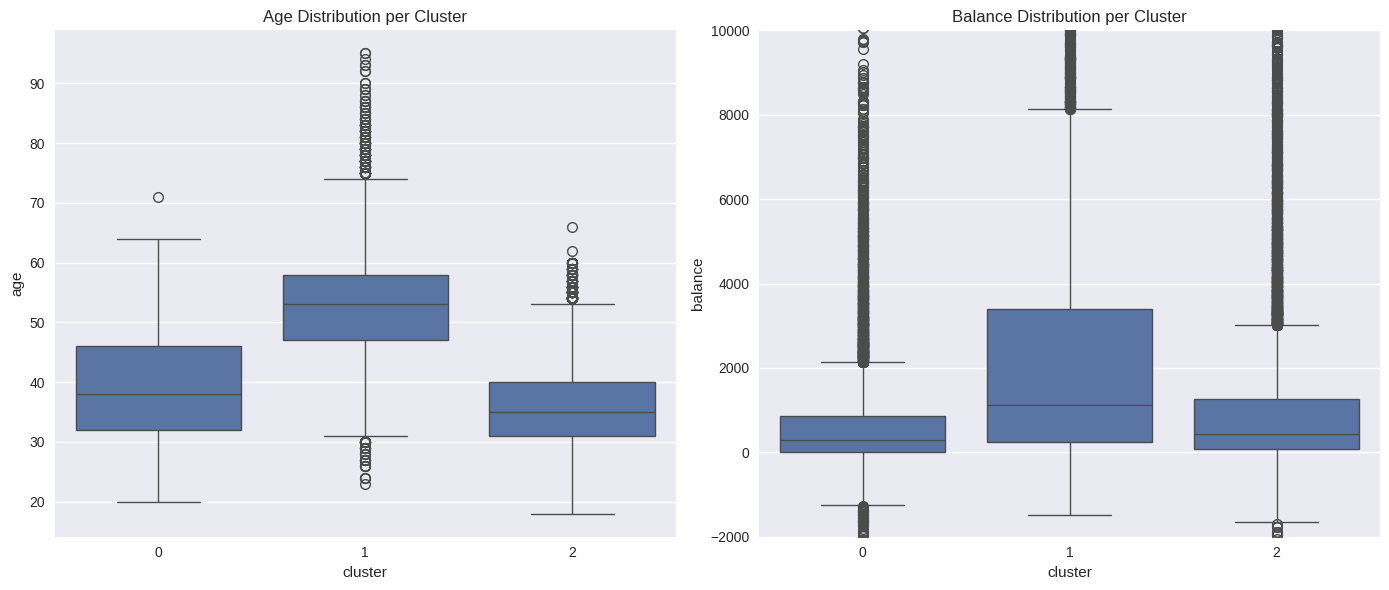

In [28]:
print("--- Initiating Cluster Interpretation ---")

data_with_cluster_labels = original_data.copy()
data_with_cluster_labels['cluster'] = kmeans_model.labels

features_for_numerical_analysis = ['age', 'balance', 'campaign', 'previous']
cluster_average_values = data_with_cluster_labels.groupby('cluster')[features_for_numerical_analysis].mean()

print("--- Cluster Averages (Numerical Features) ---")
print(cluster_average_values)
print("\n")

categorical_for_mode_analysis = ['job', 'education', 'housing', 'loan', 'marital']
cluster_mode_values = data_with_cluster_labels.groupby('cluster')[categorical_for_mode_analysis].agg(lambda x: x.mode().iloc[0])

print("--- Cluster Modes (Categorical Features) ---")
print(cluster_mode_values)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='cluster', y='age', data=data_with_cluster_labels)
plt.title('Age Distribution per Cluster')

plt.subplot(1, 2, 2)
sns.boxplot(x='cluster', y='balance', data=data_with_cluster_labels)
plt.title('Balance Distribution per Cluster')
plt.ylim(-2000, 10000)

plt.tight_layout()
plt.savefig('cluster_characteristics_plots.png')
plt.show()


In [29]:
class KMeansManhattan(KMeansClustering):
    """
    Extends KMeansClustering to utilize Manhattan (L1) distance
    instead of the default Euclidean (L2) distance for cluster assignment.
    """

    def _assign_clusters(self, feature_set):
        """Assigns each sample to the nearest centroid using Manhattan (L1) distance."""
        differences = feature_set[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]
        manhattan_distances = np.sum(np.abs(differences), axis=2)
        cluster_labels = np.argmin(manhattan_distances, axis=1)
        return cluster_labels

print("Executing K-Means with Manhattan distance metric...")
kmeans_manhattan_model = KMeansManhattan(n_clusters=3, random_state=42)
kmeans_manhattan_model.fit(reduced_data_pca)

print("Manhattan K-Means fitting complete.")

silhouette_euclidean = silhouette_score(reduced_data_pca, kmeans_model.labels)
silhouette_manhattan = silhouette_score(reduced_data_pca, kmeans_manhattan_model.labels)

print(f"Original Silhouette Score (Euclidean): {silhouette_euclidean:.3f}")
print(f"New Silhouette Score (Manhattan): {silhouette_manhattan:.3f}")


Executing K-Means with Manhattan distance metric...
Manhattan K-Means fitting complete.
Original Silhouette Score (Euclidean): 0.387
New Silhouette Score (Manhattan): 0.378


--- Commencing Outlier Detection ---
Total data points: 45211
Outlier distance threshold: 2.44
Identified 478 potential outliers.


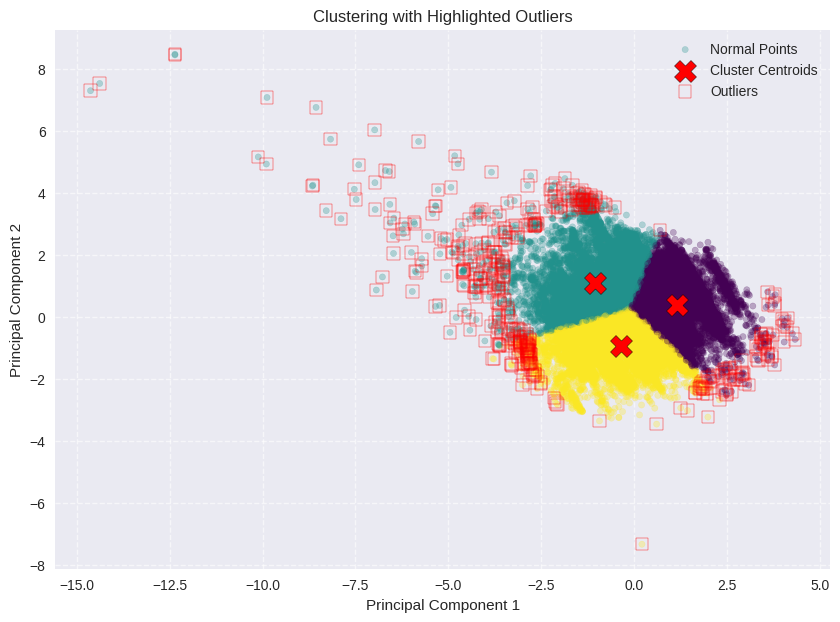

In [30]:
print("--- Commencing Outlier Detection ---")

point_to_centroid_distances = np.zeros(reduced_data_pca.shape[0])
for cluster_id in range(kmeans_model.n_clusters):
    points_in_current_cluster_mask = (kmeans_model.labels == cluster_id)
    if np.any(points_in_current_cluster_mask):
        current_cluster_points = reduced_data_pca[points_in_current_cluster_mask]
        current_centroid = kmeans_model.centroids[cluster_id]

        distances_to_centroid = np.linalg.norm(current_cluster_points - current_centroid, axis=1)

        point_to_centroid_distances[points_in_current_cluster_mask] = distances_to_centroid

mean_distance_overall = np.mean(point_to_centroid_distances)
std_distance_overall = np.std(point_to_centroid_distances)
outlier_identification_threshold = mean_distance_overall + 3 * std_distance_overall

outlier_indices_found = np.where(point_to_centroid_distances > outlier_identification_threshold)[0]
outlying_points = reduced_data_pca[outlier_indices_found]

print(f"Total data points: {len(reduced_data_pca)}")
print(f"Outlier distance threshold: {outlier_identification_threshold:.2f}")
print(f"Identified {len(outlying_points)} potential outliers.")

plt.figure(figsize=(10, 7))
plt.scatter(reduced_data_pca[:, 0], reduced_data_pca[:, 1], c=kmeans_model.labels, cmap='viridis', s=20, alpha=0.3, label='Normal Points')
plt.scatter(kmeans_model.centroids[:, 0], kmeans_model.centroids[:, 1],
            c='red', marker='X', s=250, label='Cluster Centroids', edgecolor='black')

plt.scatter(outlying_points[:, 0], outlying_points[:, 1],
            c='none', marker='s', s=80, label='Outliers', edgecolor='red')

plt.title('Clustering with Highlighted Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('clustering_outlier_visualization.png')
plt.show()
